### Name: Soumya Ranjan Nayak
### PRN:23070243063
### Subject: Deep Learning

### Dataset: Titanic_survival
### platform on: Kaggle

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#reading the data
df=pd.read_csv('/kaggle/input/titanic/train.csv')

### Exploratory Data Analysis

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.size

10692

In [6]:
df.shape

(891, 12)

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### for Cabin column:
* 687/891~= 77% which is quite high, so we can drop this column, as it will not contribute much to the analysis.
#### for age column:
* 177/891~= 20% which is low and can be modified.
* Also it is an important column for the analysis.
#### for Embarked column:
* only 2 records have null values hence can be modified.
* also is a categorical variable can be replace with mode

In [9]:
# droping the columns that not going to contribute to the value
df.drop(columns=['Cabin','Ticket','Embarked'],inplace=True)

In [10]:
#modifying the name column
df['Name']= df['Name'].str.split(',',n=1).str[0]

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,Braund,male,22.0,1,0,7.2500
1,2,1,1,Cumings,female,38.0,1,0,71.2833
2,3,1,3,Heikkinen,female,26.0,0,0,7.9250
3,4,1,1,Futrelle,female,35.0,1,0,53.1000
4,5,0,3,Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila,male,27.0,0,0,13.0000
887,888,1,1,Graham,female,19.0,0,0,30.0000
888,889,0,3,Johnston,female,NaN,1,2,23.4500
889,890,1,1,Behr,male,26.0,0,0,30.0000


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [13]:
survival_count=df['Survived'].value_counts().reset_index()
survival_count.columns=['Survived','Count']

fig = px.bar(survival_count, x='Survived', y='Count', text='Count', title='Count of Survival Categories')

fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.show()

In [14]:
gender_count=df['Sex'].value_counts().reset_index()
gender_count.columns=['Sex','Count']

fig = px.bar(gender_count, x='Sex', y='Count', text='Count', title='Count of Gender Categories')

fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.show()

In [15]:
#converting Sex column to numeric type
df['Sex']= df['Sex'].map({'male':0,'female':1})

In [16]:
# Applying KNN to handle the missing values in the column Age
from sklearn.impute import KNNImputer



age_values=df[['Age']]

imputer=KNNImputer(n_neighbors=3)

df['Age']=imputer.fit_transform(age_values)



In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

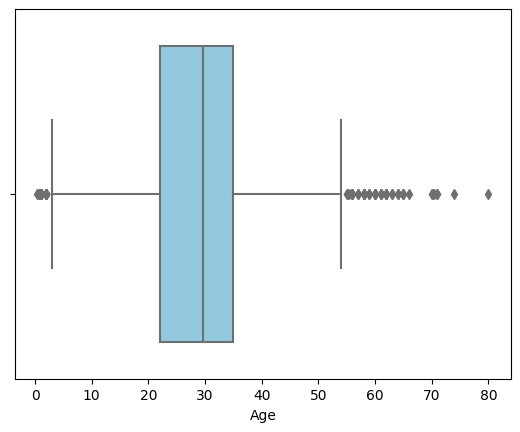

In [18]:
ds= df['Age']

sns.boxplot( x=df['Age'],color='skyblue')


plt.xlabel('Age')

plt.show()

In [19]:
Q1 = df['Age'].quantile(0.25)
Q2 = df['Age'].quantile(0.50)
Q3 = df['Age'].quantile(0.75)

# Print the quartiles
print(f"Q1 (25th percentile): {Q1}")
print(f"Q2 (50th percentile/Median): {Q2}")
print(f"Q3 (75th percentile): {Q3}")

Q1 (25th percentile): 22.0
Q2 (50th percentile/Median): 29.69911764705882
Q3 (75th percentile): 35.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


#### selceting features and Target varible

In [21]:
#Features excluding 'Survived'
X=df[['Pclass','Age', 'Sex','Fare','SibSp','Parch']]
     
#Target
y=df['Survived']

#### Train test Split

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from tensorflow.keras.losses import Huber

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3, random_state=40)

#### Implimenting Multilinear regression

In [23]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()

model.fit(X_train, y_train)

y_pred=model.predict(X_test)

In [24]:
# print(y_pred)

In [25]:
print(y_test.shape)
print(y_pred.shape)

(268,)
(268,)


In [26]:
# y_pred=y_pred.flatten()

In [27]:
# nonzero_indices = y_test != 0
# mape = np.mean(np.abs((y_test[nonzero_indices] - y_pred[nonzero_indices]) / y_test[nonzero_indices])) * 100


### Calculating (MAE, MSE,HUBER LOSS) for Multilinear Regression

In [28]:
mae=mean_absolute_error(y_test,y_pred)
print("MAE:",mae)

mse=mean_squared_error(y_test,y_pred)
print("MSE:",mse)

huber_loss= Huber(delta=1.0)
h_loss= huber_loss(y_test,y_pred).numpy()
print("Huber Loss:", h_loss)

r2_mlr= r2_score(y_test,y_pred)
print("r2_score",r2_mlr)

MAE: 0.2876611128913831
MSE: 0.13519469921046265
Huber Loss: 0.06759735
r2_score 0.44424083813574455


#### Implimenting Support Vector Regressor (SVR) 

In [29]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

#Standardize the features
scaler= StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

#initialize the SVR
svr_model=SVR(kernel='rbf')

svr_model.fit(X_train_scaled,y_train)

y_pred= svr_model.predict(X_test_scaled)

### Calculating (MAE, MSE,HUBER LOSS) for Support Vector Regressor SVR

In [30]:
mae= mean_absolute_error(y_test,y_pred)
print("MAE:",mae)

mse=mean_squared_error(y_test,y_pred)
print("MSE:",mse)

huber_loss= Huber(delta=1.0)
h_loss= huber_loss(y_test,y_pred).numpy()
print("Huber Loss:", h_loss)

r2_svr=r2_score(y_test,y_pred)
print("R2 Score:",r2_svr)

MAE: 0.22670586019511937
MSE: 0.1349490921955064
Huber Loss: 0.067474544
R2 Score: 0.4452504808922817


#### Implimentation of sequential Artificial Nural Network

In [31]:
# Import necessary libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Scale the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a simplified sequential model
model = Sequential()

# Adding an input layer and two hidden layers with ReLU activation
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Reduced complexity
model.add(Dense(16, activation='relu'))  # Another hidden layer with fewer neurons
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Compile the model with a smaller learning rate for better convergence
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

# Using early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=16, validation_data=(X_test_scaled, y_test), callbacks=[early_stop])

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate and print R² score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')


Epoch 1/200


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3843 - val_loss: 0.3182
Epoch 2/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2743 - val_loss: 0.2368
Epoch 3/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2021 - val_loss: 0.1906
Epoch 4/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1829 - val_loss: 0.1657
Epoch 5/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1529 - val_loss: 0.1498
Epoch 6/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1530 - val_loss: 0.1405
Epoch 7/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1479 - val_loss: 0.1355
Epoch 8/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1373 - val_loss: 0.1328
Epoch 9/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1345 - val_loss: 0.1297
Epoch 10/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1404 - val_loss: 0.1290
Epoch 11/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1332 - val_loss: 0.1287
Epoch 12/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1427 - val_lo

### Calculating (MAE, MSE,HUBER LOSS) for Sequential Artificial Nural Network

In [32]:
mae=mean_absolute_error(y_test,y_pred)
print("MAE:",mae)

mse=mean_squared_error(y_test,y_pred)
print("MSE:",mse)

huber_loss= Huber(delta=1.0)
h_loss= huber_loss(y_test,y_pred).numpy()
print("Huber Loss:", h_loss)


r2_ann= r2_score(y_test,y_pred)
print("r2_score:",r2_ann)

MAE: 0.26821588289771064
MSE: 0.12428979999420499
Huber Loss: 0.062144898
r2_score: 0.4890687617454339


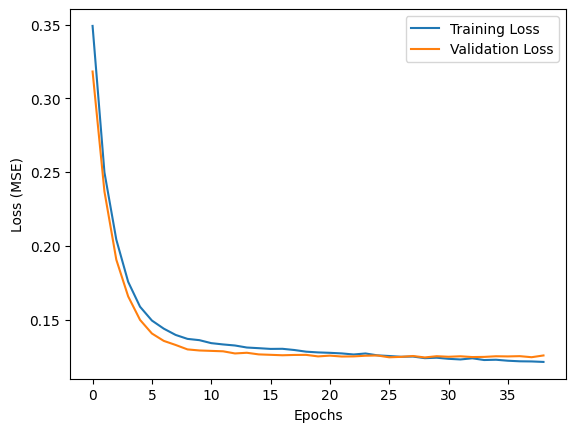

In [33]:
#training/validation loss using history.history

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

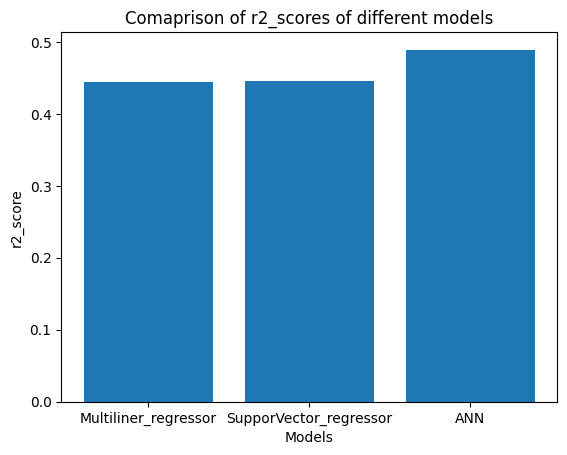

In [34]:
r2_scores=[r2_mlr,r2_svr,r2_ann]
models=['Multiliner_regressor','SupporVector_regressor','ANN']

plt.bar(models,r2_scores)

plt.xlabel('Models')
plt.ylabel('r2_score')
plt.title('Comaprison of r2_scores of different models')

plt.show()